In [58]:
from midiutil import MIDIFile
import rebound
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call

In [59]:
sim = rebound.Simulation.from_file("trappist.bin")
ps = sim.particles

Norbits = 10 # length of clip in number of orbits of the of outer planet

# 12 notes between octaves, freq = f0*2**(n/12). 
# n = 12 log_2(freq/f0)
# star, then planets from inside out
freqs = [744.96, 1624.73500794, 1013.5641465, 606.14619962, 402.42797069, 266.61557887, 198.71039594, 130.81]
basefreq = freqs[-1]

midinotes = []
for freq in freqs:
    midinote = 48+12*np.log(freq/basefreq)/np.log(2)
    midinotes.append(int(np.round(midinote)))

bodies = list(range(sim.N))
notes = dict(zip(bodies, midinotes))

channel  = 0
time     = 0   # In beats
duration = 5   # In beats
tempo    = 30  # In BPM. One beat = one outer planet orbit.
volume   = 100 # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1, adjust_origin=True) # One track, defaults to format 1 (tempo track
                     # automatically created)
MyMIDI.addTempo(0, time, tempo)

sim.t = 0
sim.dt = ps[1].P/100
tmax = Norbits*ps[-1].P

sinthetaprev = np.zeros(sim.N)
while sim.t < tmax:
    beat = sim.t/ps[-1].P
    sim.step()
    for j in range(1,sim.N-1):
        sintheta = np.sin(ps[j+1].theta-ps[j].theta)
        if sinthetaprev[j] < 0 and sintheta > 0:
            print(sim.t, beat, j)
            MyMIDI.addNote(0, channel, notes[j], beat, duration, volume)
        sinthetaprev[j] = sintheta
    beat += 1
   
with open("conjunctions.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

/Users/dtamayo/Documents/workspace/rebound/rebound/simulation.py:374: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/dtamayo/Documents/workspace/rebound/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


6.407533214832966 0.08935043566851941 1
22.103050355754117 0.3103217180749412 1
22.16183506414708 0.3111495579987655 3
22.220619772540044 0.31197739685623777 2
23.69023748236412 0.3326724200851741 5
37.739782788282305 0.5303324109120767 1
43.91217716954343 0.617168746740379 4
45.67571842133233 0.6419868430654174 2
53.3765152208105 0.7503879762868807 1
69.07203236173042 0.9713182557782936 1
69.18960177851632 0.9729731374407546 2
69.18960177851632 0.9729731374407546 3
84.76754950264778 1.192247937410241 1
92.70348513569589 1.3039602008525777 2
95.46636643016448 1.3428409402476116 6
100.4042819351722 1.4123444490307013 1
114.39504253269403 1.6091705799686469 4
116.09979907608955 1.633161491996968 1
116.21736849287545 1.6348166127933765 2
116.21736849287545 1.6348166127933765 3
131.73653150861577 1.8533113262547884 1
139.6724671416677 1.9649329359684868 2
147.37326394114774 2.073260698118727 1
163.0687810820727 2.2947248420591557 1
163.18635049885864 2.296384535159523 2
163.18635049885864 

In [57]:
call("open midi.mid", shell=True)

0

Period ratios

In [5]:
for i in range(1,7):
    print(ps[i+1].P/ps[i].P)

1.6007069750574596
1.6677171379478097
1.5015367982347911
1.5016057456142866
1.3352292211516095
1.5039807597198247


/Users/dtamayo/Documents/workspace/rebound/rebound/simulation.py:374: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/dtamayo/Documents/workspace/rebound/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


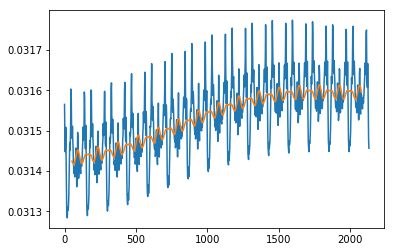

In [39]:
sim = rebound.Simulation.from_file("trappist.bin")
sim.t = 0
ps = sim.particles
Nout = 1000
es = np.zeros((sim.N, Nout))
pomegas = np.zeros((sim.N, Nout))
dpomegas = np.zeros((6, Nout))
times = np.linspace(0, ps[-1].P*30, Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    for j in range(1,sim.N):
        es[j,i] = ps[j].e
        pomegas[j,i] = np.cos(ps[j].pomega)
    for j in range(sim.N-2):
        dpomegas[j,i] = np.cos(ps[j+2].pomega-ps[j+1].pomega)
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
k=-4
ax.plot(times, es[k])
N=50
ax.plot(np.convolve(times, np.ones((N,))/N, mode='valid'), np.convolve(es[k], np.ones((N,))/N, mode='valid'))

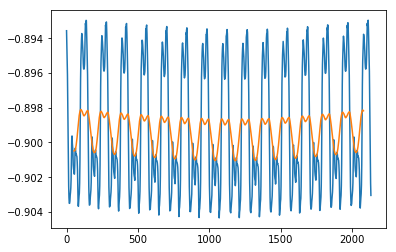

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
k=4
ax.plot(times, dpomegas[k])
N=50
ax.plot(np.convolve(times, np.ones((N,))/N, mode='valid'), np.convolve(dpomegas[k], np.ones((N,))/N, mode='valid'))

In [26]:
npa.convolve(np.linspace(0,10,11), np.ones((3,))/3, mode='same')

array([ 0.33333333,  1.        ,  2.        ,  3.        ,  4.        ,
        5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
        6.33333333])

In [22]:
test = np.array([10, 0, 0, 0, 0, 0, 1000])
N = 3
ar = np.convolve(test, np.ones((N,))/N, mode='same')
print(ar)
print(ar.shape)

[   3.33333333    3.33333333    0.            0.            0.
  333.33333333  333.33333333]
(7,)


/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


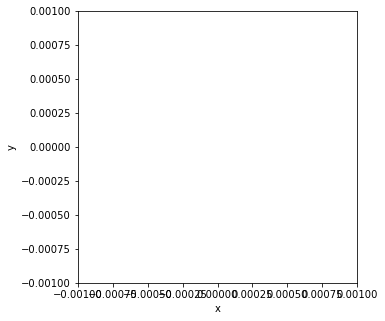

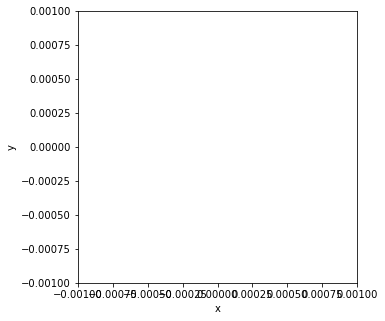

In [8]:
rebound.OrbitPlot(sim)